In [5]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ("Laptop", 5, 60000),
    ("Laptop", 3, 60000),
    ("Mobile", 10, 15000),
    ("Mobile", 7, 15000),
    ("Headphones", 15, 2000),
    ("Headphones", 20, 2000),
    ("Tablet", 4, 25000),
    ("Tablet", 2, 25000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# Commit and close
conn.commit()
conn.close()

print("✅ sales_data.db created with sample data!")


✅ sales_data.db created with sample data!


Sales Summary:
      product  total_qty   revenue
0  Headphones         35   70000.0
1      Laptop          8  480000.0
2      Mobile         17  255000.0
3      Tablet          6  150000.0


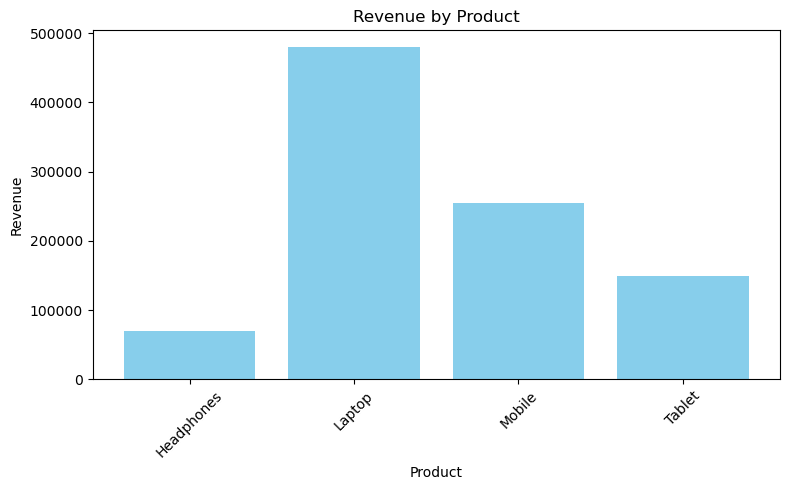

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("sales_data.db")

# Step 2: SQL query to get total quantity & revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 3: Print results
print("Sales Summary:")
print(df)

# Step 4: Plot bar chart for revenue by product
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart
plt.show()

# Step 5: Close the database connection
conn.close()


In [7]:


## Objective
Get a basic sales summary from a small SQLite database using Python.

## Tools Used
- Python (`sqlite3`, `pandas`, `matplotlib`)
- SQLite (built into Python)

## Steps Performed
1. Created `sales_data.db` with sample sales data.
2. Connected Python to SQLite using `sqlite3.connect()`.
3. Ran an SQL query to:
   - Calculate total quantity sold (`SUM(quantity)`)
   - Calculate total revenue (`SUM(quantity * price)`)
   - Group results by product (`GROUP BY product`)
4. Loaded SQL results into Pandas DataFrame.
5. Printed the summary.
6. Visualized revenue per product using a bar chart.

## Files in Repo
- `create_sales_db.py` → Script to create SQLite database.
- `sales_summary.py` → Main analysis script.
- `sales_chart.png` → Output bar chart.

## Sample Output
**Sales Summary:**
| Product     | Total Qty | Revenue   |
|-------------|-----------|-----------|
| Laptop      | 8         | 480000    |
| Mobile      | 17        | 255000    |
| Headphones  | 35        | 70000     |
| Tablet      | 6         | 150000    |



SyntaxError: invalid character '→' (U+2192) (3600098001.py, line 22)